In [ ]:
import gensim
from gensim.models import Word2Vec
import pandas
import numpy

#Distance Matrix Analysis

In [ ]:
model = Word2Vec.load('./umbc/umc_listen_data/OlfModelIter30_nonSG')
print(model)

Word2Vec(vocab=17505, size=200, alpha=0.025)


In [ ]:
df = pandas.read_csv("./umbc/descriptor_top_300/top_300/Listen_oai_300.csv")
df

,Unnamed: 0,OlfN,TotalN,Tokens,OAI,OSI
0,attentively_RB,163,348,['attentively_RB'],-1.094215,9.244721
1,taru_NN,14,45,['taru_NNP'],-1.684498,12.786095
2,intently_RB,128,444,['intently_RB'],-1.794416,9.593449
3,stethoscope_NN,22,195,"['stethoscope_NN', 'stethoscope_NNS']",-3.147899,12.134018
4,mp3s_NN,17,196,['mp3s_NNS'],-3.527247,12.505987
...,...,...,...,...,...,...
295,thinking_NN,36,15064,['thinking_NN'],-8.708892,11.423524
296,mind_VB,13,5485,"['mind_VB', 'mind_VBD']",-8.720836,12.893010
297,repeatedly_RB,18,7636,['repeatedly_RB'],-8.728676,12.423524
298,judge_VB,25,10667,"['judge_VBG', 'judge_VB', 'judge_VBN', 'judge_...",-8.737011,11.949593


In [ ]:
word_vectors = []

descriptors = df["Unnamed: 0"].values

for descriptor in descriptors:
  if descriptor not in model:
    continue 
    
  vector = model[descriptor]
  word_vectors.append(gensim.matutils.unitvec(vector))

print(len(word_vectors))

300


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [ ]:
# Stack vectors - examples are rows, columns are features; examples x features
word_matrix = numpy.row_stack(word_vectors)
print(word_matrix.shape)

(300, 200)


In [ ]:
distance_matrix = numpy.corrcoef(word_matrix, rowvar=True)
scaled_distance_matrix = 0.5 * (1 - distance_matrix)

print(scaled_distance_matrix.shape)
print(scaled_distance_matrix) # Expect zeros on diagonal

(300, 300)
[[0.00000000e+00 5.29245772e-01 1.70118697e-01 ... 4.39294301e-01
  4.78580289e-01 5.05189063e-01]
 [5.29245772e-01 0.00000000e+00 5.27629198e-01 ... 5.39901834e-01
  4.88800288e-01 5.43684627e-01]
 [1.70118697e-01 5.27629198e-01 0.00000000e+00 ... 4.07698375e-01
  4.87565855e-01 5.03185361e-01]
 ...
 [4.39294301e-01 5.39901834e-01 4.07698375e-01 ... 0.00000000e+00
  4.99397750e-01 4.45271501e-01]
 [4.78580289e-01 4.88800288e-01 4.87565855e-01 ... 4.99397750e-01
  1.11022302e-16 4.52551391e-01]
 [5.05189063e-01 5.43684627e-01 5.03185361e-01 ... 4.45271501e-01
  4.52551391e-01 0.00000000e+00]]


## Dendrogram

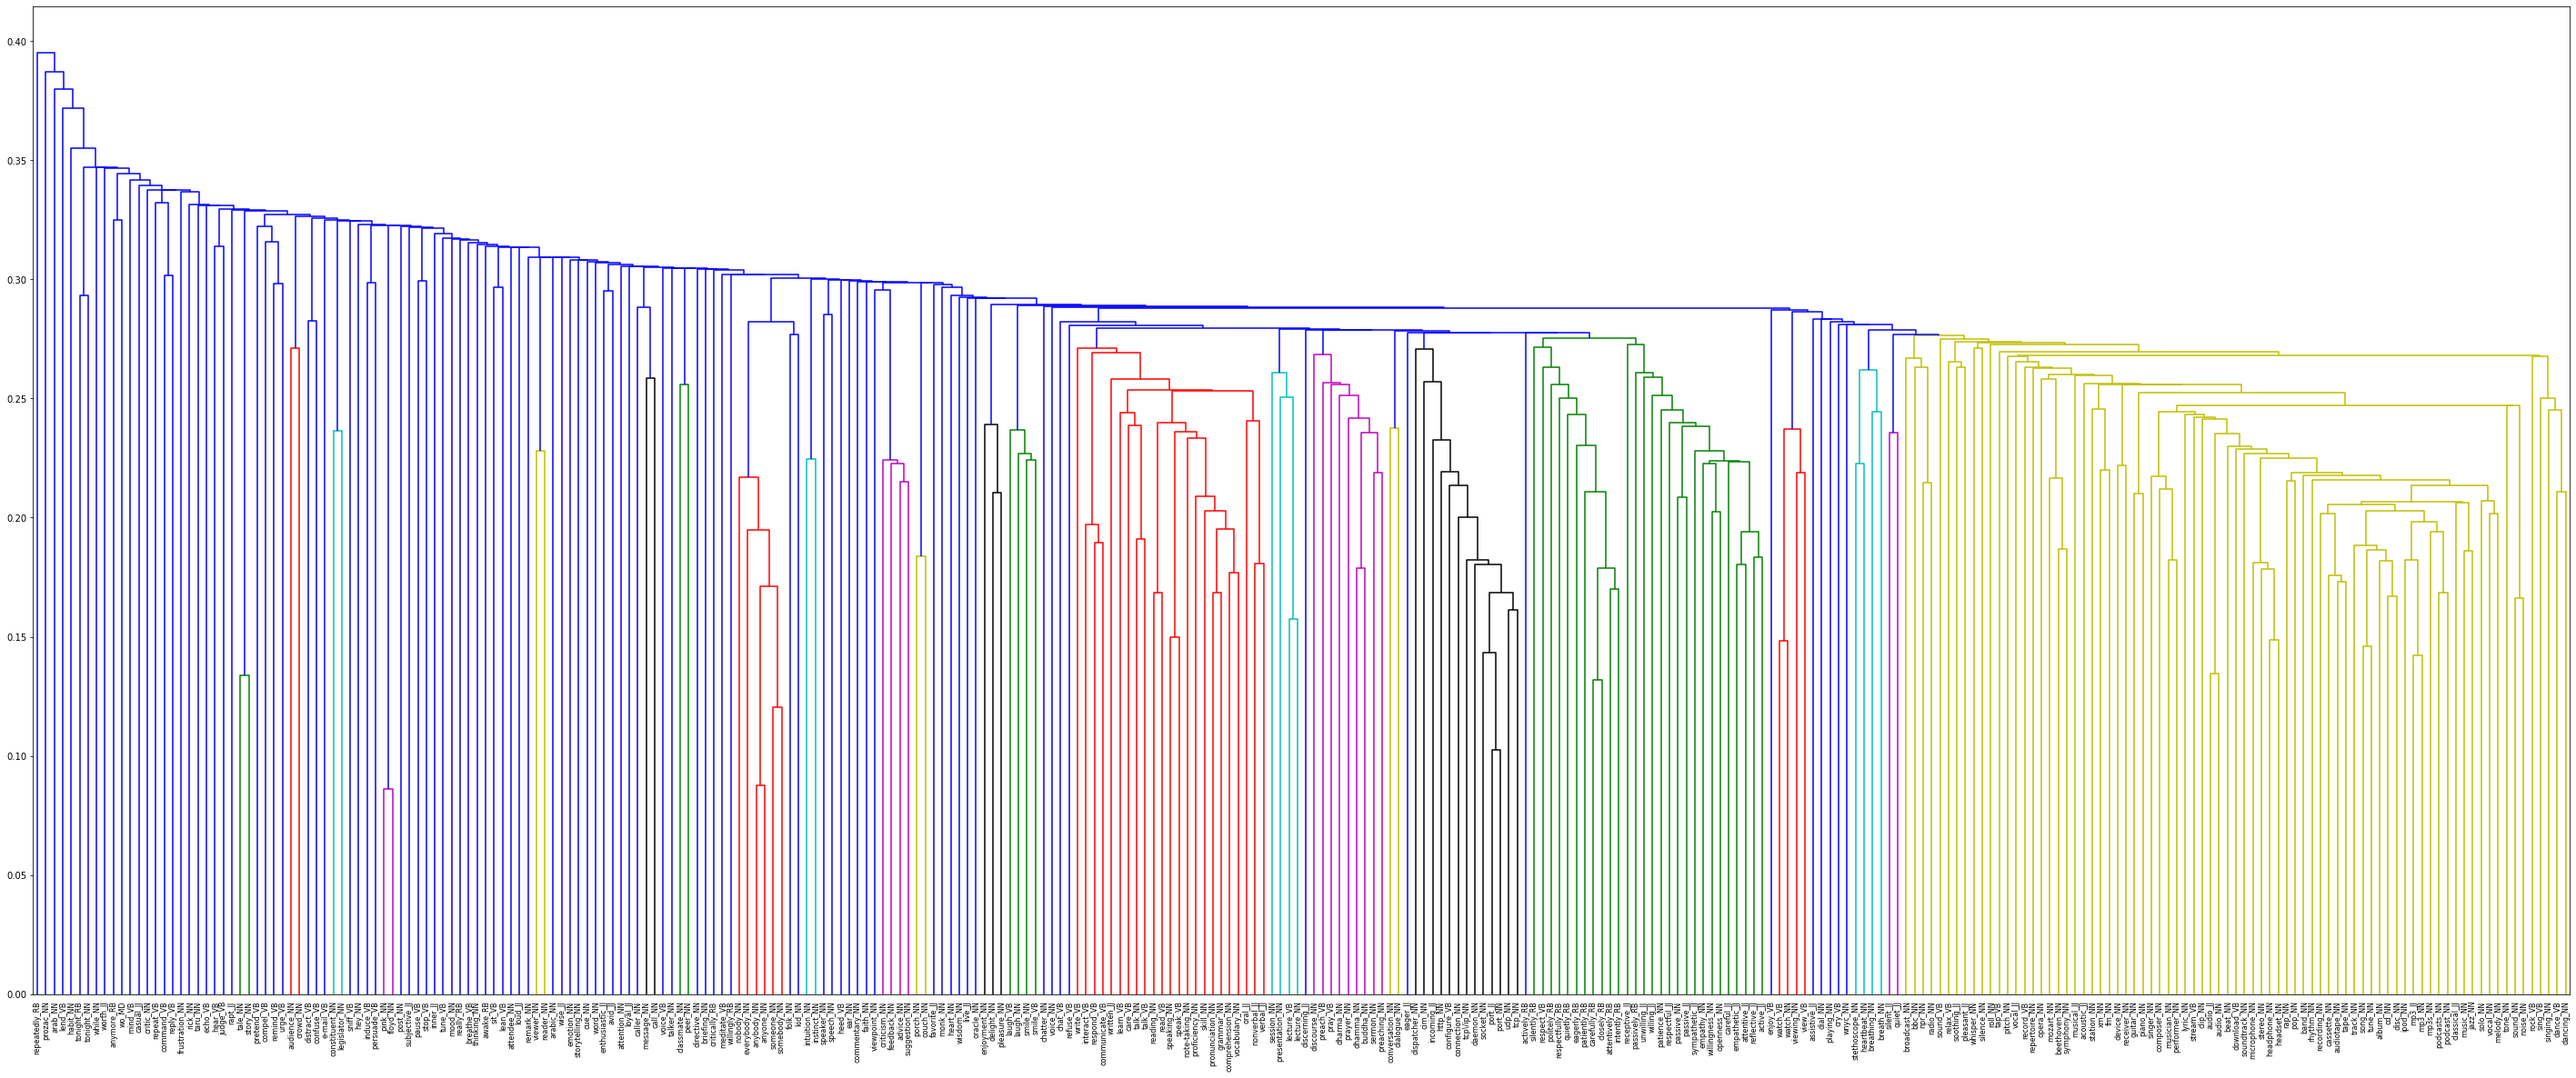

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt

plt.figure(figsize=(50,20))
# convert the redundant n*n square matrix form into a condensed nC2 array
distArray = squareform(scaled_distance_matrix, checks=False)
linkage_matrix = linkage(distArray, "single")
dendrogram(linkage_matrix, labels=descriptors,
           leaf_rotation=90.,  # rotates the x axis labels
          leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

## NMF

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
nmf = NMF(n_components=10, solver='cd')
W = nmf.fit_transform(scaled_distance_matrix) # Use the distance matrix above
H = nmf.components_
err = nmf.reconstruction_err_
print(err)

10.068237071969612


In [ ]:
words = 15

for i, topic in enumerate(H):
  print("Basis {}: {}".format(i + 1, ",".join([str(x) for x in index_to_word(topic.argsort()[-words:])])))
  print("Weights {}: {}".format(i + 1, ",".join([str(round(topic[x], 3)) for x in topic.argsort()[-words:]])))
  print()

Basis 1: contact_VB,intimidate_VB,make_VB,express_VB,honor_VB,value_VB,empower_VB,threaten_VB,personally_RB,betray_VB,truly_RB,alienate_VB,trust_VB,abandon_VB,respect_VB
Weights 1: 0.48,0.486,0.489,0.493,0.498,0.499,0.502,0.502,0.509,0.517,0.524,0.529,0.553,0.571,0.605

Basis 2: thought_NN,disappointment_NN,frustration_NN,fear_NN,happiness_NN,anger_NN,sadness_NN,grief_NN,emotional_JJ,intense_JJ,evoke_VB,anxiety_NN,perception_NN,emotion_NN,helplessness_NN
Weights 2: 0.556,0.557,0.558,0.562,0.568,0.573,0.573,0.574,0.579,0.58,0.582,0.585,0.596,0.602,0.606

Basis 3: bit_NN,sick_JJ,cool_JJ,around_RB,sad_JJ,quite_RB,tired_JJ,nice_JJ,weird_JJ,'m_VB,suddenly_RB,'d_MD,funny_JJ,pretty_RB,really_RB
Weights 3: 0.369,0.37,0.37,0.37,0.376,0.377,0.378,0.378,0.392,0.395,0.395,0.401,0.417,0.43,0.433

Basis 4: empower_VB,please_VB,strongly_RB,bless_VB,wonderful_JJ,ought_MD,confident_JJ,solid_JJ,welcome_JJ,competent_JJ,truly_RB,fortunate_JJ,value_VB,honor_VB,privileged_JJ
Weights 4: 0.292,0.292,0.292,0.3

## Agglomerative Clustering

### Descriptors by Cluster

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

clusters = 2
clustering = AgglomerativeClustering(affinity='precomputed', n_clusters=clusters, linkage='complete').fit(scaled_distance_matrix)
print(clustering.labels_)

for i in range(clusters):
  print("--------------Cluster {}----------------------".format(i))
  indices = list(numpy.argwhere(clustering.labels_ == i))

  for idx in indices:
    print(descriptors[idx[0]])

[0 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0
 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0
 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 0 0]
--------------Cluster 0----------------------
attentively_RB
intently_RB
stethoscope_NN
rapt_JJ
prozac_NN
sermon_NN
preaching_NN
respectfully_RB
patiently_RB
politely_RB
soothing_JJ
dhamma_NN
carefully_RB
chatter_NN
music_NN
whisper_NN
empathy_NN
mozart_NN
eagerly_RB
dharma_NN
beethoven_NN
heartbeat_NN
silently_RB
quietly_RB
singing_NN
pink_NN
pause_VB
heed_VB
ear_NN
rap_NN
song_NN
sniff

### Optimal Clustering by Silhouette Score

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

for i in range(2, 245, 1):
  clustering = AgglomerativeClustering(affinity='precomputed', n_clusters=i, linkage='complete').fit_predict(scaled_distance_matrix)
  # print(clustering.labels_)

  print(i, silhouette_score(distance_matrix, clustering))

2 0.08674266949346257
3 0.03287366590619161
4 0.05166541582498147
5 0.05244599667247504
6 0.07821481786529852
7 0.06708044633168048
8 0.06578841328589978
9 0.05473482012364496
10 0.06088330649302565
11 0.061982080652423284
12 0.06779132167981862
13 0.07628049439256922
14 0.06979749166225759
15 0.0735289069617712
16 0.07223333644214053
17 0.07167371878493609
18 0.06904099450599104
19 0.07006440009360322
20 0.07678031119494645
21 0.07693150795291202
22 0.07327782616378627
23 0.0728040573201752
24 0.07487875008088901
25 0.07606394081494974
26 0.07325155510953422
27 0.07373102929282906
28 0.07265402344448761
29 0.07334792468184732
30 0.0735511343670878
31 0.07532223798874661
32 0.07467853704452594
33 0.07954776907162556
34 0.08160323862419074
35 0.08319269133982422
36 0.08396271704944287
37 0.08291634947242407
38 0.08438940498825412
39 0.08600223445682519
40 0.084276561496103
41 0.08471503847405706
42 0.08373031639846473
43 0.08414354061832155
44 0.0869517602891285
45 0.08769991644830535
4

# DataFrame Comparisons

In [ ]:
df1 = pandas.read_csv("./umbc/descriptor_top_300/top_300/Look_300_oai.csv")
df1

,Unnamed: 0,OlfN,TotalN,Tokens,OAI,OSI
0,askance_RB,76,91,['askance_RB'],-0.259867,12.940352
1,forward_RB,10302,39341,['forward_RB'],-1.933109,5.857643
2,let_NN,386,2508,"['let_NNP', 'let_NNS', 'let_NN']",-2.699865,10.595823
3,closer_RB,700,6025,"['closer_RBR', 'closer_RB']",-3.105534,9.737069
4,bleak_JJ,100,1135,"['bleak_JJ', 'bleak_JJR', 'bleak_JJS']",-3.504620,12.544424
...,...,...,...,...,...,...
295,match_NN,82,11050,"['match_NN', 'match_NNS', 'match_NNP']",-7.074207,12.830728
296,opportunity_NN,1060,142879,"['opportunity_NNP', 'opportunity_NN', 'opportu...",-7.074586,9.138431
297,welcome_VB,119,16065,"['welcome_VBG', 'welcome_VB', 'welcome_VBP', '...",-7.076816,12.293462
298,ordinary_JJ,109,14827,['ordinary_JJ'],-7.087755,12.420095


In [ ]:
df2 = pandas.read_csv("./umbc/descriptor_top_300/top_300/Smell_oai_300.csv")
df2

,Unnamed: 0,OlfN,TotalN,Tokens,OAI,OSI
0,acrid_JJ,27,114,['acrid_JJ'],-2.078003,9.397873
1,musty_JJ,43,233,['musty_JJ'],-2.437921,8.726495
2,fishy_JJ,27,177,['fishy_JJ'],-2.712718,9.397873
3,pungent_JJ,39,396,['pungent_JJ'],-3.343954,8.867358
4,putrid_JJ,10,108,['putrid_JJ'],-3.432959,10.830832
...,...,...,...,...,...,...
295,sleep_VB,8,14705,"['sleep_VB', 'sleep_VBG', 'sleep_VBD']",-10.844019,11.152760
296,neighbor_NN,8,14752,"['neighbor_NN', 'neighbor_NNS']",-10.848623,11.152760
297,morning_NN,18,33902,['morning_NN'],-10.879158,9.982835
298,dead_JJ,11,20982,['dead_JJ'],-10.897433,10.693329


## Intersection

In [ ]:
# Inner join
merged = pandas.merge(df1, df2, how='inner', on=['Unnamed: 0'])
merged

,Unnamed: 0,OlfN_x,TotalN_x,Tokens_x,OAI_x,OSI_x,OlfN_y,TotalN_y,Tokens_y,OAI_y,OSI_y
0,nice_JJ,559,20786,"['nice_JJ', 'nice_JJR', 'nice_JJS']",-5.216620,10.061575,20,20453,"['nice_JJR', 'nice_JJ']",-9.998097,9.830832
1,pretty_RB,635,23796,['pretty_RB'],-5.227819,9.877667,20,23796,['pretty_RB'],-10.216503,9.830832
2,funny_JJ,158,5946,"['funny_JJ', 'funny_JJS', 'funny_JJR']",-5.233923,11.884499,25,5524,['funny_JJ'],-7.787641,9.508904
3,everywhere_RB,249,9614,['everywhere_RB'],-5.270919,11.228278,10,9614,['everywhere_RB'],-9.908993,10.830832
4,fresh_JJ,426,17486,"['fresh_JJ', 'fresh_JJR', 'fresh_JJS']",-5.359203,10.453570,91,17486,"['fresh_JJ', 'fresh_JJS', 'fresh_JJR']",-7.586118,7.644966
5,dirty_JJ,107,4639,"['dirty_JJ', 'dirty_JJR']",-5.438131,12.446813,36,4637,"['dirty_JJ', 'dirty_JJS']",-7.009051,8.982835
6,strange_JJ,233,10821,"['strange_JJ', 'strange_JJS']",-5.537360,11.324094,35,10602,['strange_JJ'],-8.242766,9.023477
7,cool_JJ,283,13272,"['cool_JJ', 'cool_JJR', 'cool_JJS']",-5.551440,11.043622,11,12873,"['cool_JJ', 'cool_JJR']",-10.192629,10.693329
8,beautiful_JJ,420,21883,['beautiful_JJ'],-5.703277,10.474034,12,21883,['beautiful_JJ'],-10.832560,10.567798
9,odd_JJ,107,5582,"['odd_JJ', 'odd_JJR']",-5.705099,12.446813,14,5532,['odd_JJ'],-8.626231,10.345405


In [ ]:
merged.to_csv("look_smell_intersection_300_descriptors.csv", index=False)

## Difference

In [ ]:
df2['Unnamed: 0'].isin(df1['Unnamed: 0'])

0      False
1      False
2      False
3      False
4      False
       ...  
295    False
296    False
297    False
298    False
299    False
Name: Unnamed: 0, Length: 300, dtype: bool

In [ ]:
diff = df2[~df2['Unnamed: 0'].isin(df1['Unnamed: 0'])]  # not in df1['A']
diff

,Unnamed: 0,OlfN,TotalN,Tokens,OAI,OSI
0,acrid_JJ,27,114,['acrid_JJ'],-2.078003,9.397873
1,musty_JJ,43,233,['musty_JJ'],-2.437921,8.726495
2,fishy_JJ,27,177,['fishy_JJ'],-2.712718,9.397873
3,pungent_JJ,39,396,['pungent_JJ'],-3.343954,8.867358
4,putrid_JJ,10,108,['putrid_JJ'],-3.432959,10.830832
...,...,...,...,...,...,...
295,sleep_VB,8,14705,"['sleep_VB', 'sleep_VBG', 'sleep_VBD']",-10.844019,11.152760
296,neighbor_NN,8,14752,"['neighbor_NN', 'neighbor_NNS']",-10.848623,11.152760
297,morning_NN,18,33902,['morning_NN'],-10.879158,9.982835
298,dead_JJ,11,20982,['dead_JJ'],-10.897433,10.693329


In [ ]:
diff.to_csv("look_minus_smell_300_descriptors.csv")

# POS Frequencies

In [ ]:
df = pandas.read_csv("./umbc/descriptor_top_300/top_300/Look_300_oai.csv")
df

,Unnamed: 0,OlfN,TotalN,Tokens,OAI,OSI
0,askance_RB,76,91,['askance_RB'],-0.259867,12.940352
1,forward_RB,10302,39341,['forward_RB'],-1.933109,5.857643
2,let_NN,386,2508,"['let_NNP', 'let_NNS', 'let_NN']",-2.699865,10.595823
3,closer_RB,700,6025,"['closer_RBR', 'closer_RB']",-3.105534,9.737069
4,bleak_JJ,100,1135,"['bleak_JJ', 'bleak_JJR', 'bleak_JJS']",-3.504620,12.544424
...,...,...,...,...,...,...
295,match_NN,82,11050,"['match_NN', 'match_NNS', 'match_NNP']",-7.074207,12.830728
296,opportunity_NN,1060,142879,"['opportunity_NNP', 'opportunity_NN', 'opportu...",-7.074586,9.138431
297,welcome_VB,119,16065,"['welcome_VBG', 'welcome_VB', 'welcome_VBP', '...",-7.076816,12.293462
298,ordinary_JJ,109,14827,['ordinary_JJ'],-7.087755,12.420095


In [ ]:
from collections import defaultdict 
d = defaultdict(int)
count = 0

for descriptor in df["Unnamed: 0"]:
  split_descriptor = descriptor.split("_")
  if len(split_descriptor) < 2:
    continue

  d[split_descriptor[1]] += 1
  count += 1

print("Total Count:", count)
for key, value in d.items():
  print(key, "occurs with frequency", round(value/count*100, 2), "%")

Total Count: 300
RB occurs with frequency 21.0 %
NN occurs with frequency 39.33 %
JJ occurs with frequency 29.33 %
VB occurs with frequency 9.0 %
MD occurs with frequency 1.33 %


# Lancaster

## Intersection with Modality

In [ ]:
lancaster = pandas.read_csv("./umbc/descriptor_top_300/Lancaster_sensorimotor_norms_for_39707_words.csv")
lancaster

,Word,Auditory.mean,Gustatory.mean,Haptic.mean,Interoceptive.mean,Olfactory.mean,Visual.mean,Foot_leg.mean,Hand_arm.mean,Head.mean,Mouth.mean,Torso.mean,Auditory.SD,Gustatory.SD,Haptic.SD,Interoceptive.SD,Olfactory.SD,Visual.SD,Foot_leg.SD,Hand_arm.SD,Head.SD,Mouth.SD,Torso.SD,Max_strength.perceptual,Minkowski3.perceptual,Exclusivity.perceptual,Dominant.perceptual,Max_strength.action,Minkowski3.action,Exclusivity.action,Dominant.action,Max_strength.sensorimotor,Minkowski3.sensorimotor,Exclusivity.sensorimotor,Dominant.sensorimotor,N_known.perceptual,List_N.perceptual,Percent_known.perceptual,N_known.action,List_N.action,Percent_known.action,Mean_age.perceptual,Mean_age.action,List#.perceptual,List#.action
0,A,2.214286,0.000000,0.428571,0.000000,0.000000,2.428571,0.000000,0.357143,1.071429,0.357143,0.000000,2.259291,0.000000,0.937614,0.000000,0.000000,2.408775,0.000000,1.336306,2.129077,1.336306,0.000000,2.428571,2.934085,0.478873,Visual,1.071429,1.097256,0.600000,Head,2.428571,2.984370,0.354167,Visual,14,19,0.736842,14,21,0.666667,36.857143,35.571429,PN_Sample_250.csv,MN_sample_250.csv
1,A CAPPELLA,4.333333,0.000000,0.222222,0.722222,0.000000,1.666667,0.380952,0.428571,2.714286,3.714286,1.000000,1.608799,0.000000,0.548319,1.363626,0.000000,1.909727,0.973457,1.075706,1.901127,1.847779,1.449138,4.333333,4.420628,0.624000,Auditory,3.714286,4.167341,0.404624,Mouth,4.333333,5.414783,0.285416,Auditory,18,19,0.947368,21,21,1.000000,35.722222,35.142857,PN_Sample_237.csv,MN_sample_237.csv
2,AARDVARK,1.625000,0.562500,1.625000,0.062500,1.250000,4.125000,0.176471,0.705882,2.235294,0.058824,0.058824,1.784190,1.263263,1.927866,0.250000,1.879716,1.258306,0.528594,1.311712,1.921243,0.242536,0.242536,4.125000,4.325018,0.439189,Visual,2.235294,2.258902,0.672727,Head,4.125000,4.521367,0.325677,Visual,16,18,0.888889,17,20,0.850000,36.062500,40.823529,PN_Sample_505.csv,MN_sample_505.csv
3,ABACK,1.294118,0.058824,0.294118,1.352941,0.000000,2.823529,0.000000,0.000000,3.272727,0.363636,0.181818,1.896204,0.242536,0.985184,1.800735,0.000000,2.007339,0.000000,0.000000,1.902152,0.924416,0.603023,2.823529,3.006634,0.484848,Visual,3.272727,3.274410,0.857143,Head,3.272727,3.963988,0.339434,Head,17,20,0.850000,11,19,0.578947,43.823529,42.545455,PN_Sample_365.csv,MN_sample_365.csv
4,ABACUS,1.555556,0.166667,3.722222,0.277778,0.111111,3.944444,0.000000,2.473684,2.631579,0.105263,0.000000,1.616904,0.514496,1.406102,0.669113,0.471405,1.304843,0.000000,2.269812,2.191157,0.315302,0.000000,3.944444,4.887248,0.392045,Visual,2.631579,3.219225,0.505051,Head,3.944444,5.314414,0.263168,Visual,18,19,0.947368,19,21,0.904762,36.777778,34.631579,PN_Sample_606.csv,MN_sample_606.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39702,ZOOM,1.050000,0.000000,0.400000,0.800000,0.000000,3.800000,1.263158,1.473684,2.631579,0.894737,0.842105,1.669384,0.000000,1.095445,1.281447,0.000000,1.472556,1.661395,1.645479,2.005839,1.629408,1.384965,3.800000,3.839605,0.628099,Visual,2.631579,2.914380,0.251852,Head,3.800000,4.333136,0.288858,Visual,20,20,1.000000,19,19,1.000000,34.500000,41.578947,PN_Sample_170.csv,MN_sample_170.csv
39703,ZOOM IN,0.473684,0.105263,0.315789,0.157895,0.105263,3.789474,0.300000,1.650000,3.150000,0.150000,0.350000,0.904828,0.458831,0.945905,0.688247,0.458831,1.781976,0.656947,1.814416,2.109502,0.366348,0.587143,3.789474,3.792814,0.744681,Visual,3.150000,3.296453,0.535714,Head,3.789474,4.487745,0.349301,Visual,19,19,1.000000,20,20,1.000000,40.526316,35.400000,PN_Sample_580.csv,MN_sample_580.csv
39704,ZOOM LENS,0.555556,0.000000,1.111111,0.277778,0.000000,3.444444,0.052632,1.789474,3.421053,0.315789,0.157895,0.983524,0.000000,1.745208,0.826442,0.000000,1.947010,0.229416,1.812884,1.952656,0.945905,0.501460,3.444444,3.487855,0.639175,Visual,3.421053,3.577964,0.587156,Head,3.444444,4.451911,0.309593,Visual,18,18,1.000000,19,19,1.000

In [ ]:
word_primary_dict = lancaster.set_index('Word')['Dominant.perceptual'].to_dict()
word_exclusitivity_dict = lancaster.set_index('Word')['Exclusivity.perceptual'].to_dict()
word_strength_dict = lancaster.set_index('Word')['Max_strength.perceptual'].to_dict()

In [ ]:
descriptors = pandas.read_csv("./umbc/descriptor_top_300/top_300/Feel_oai_300.csv")
descriptors

,Unnamed: 0,OlfN,TotalN,Tokens,OAI,OSI
0,nauseous_JJ,89,193,['nauseous_JJ'],-1.116724,12.276517
1,pressured_JJ,116,270,['pressured_JJ'],-1.218835,11.894269
2,dizzy_JJ,127,415,['dizzy_JJ'],-1.708283,11.763565
3,helplessness_NN,119,429,['helplessness_NN'],-1.850016,11.857432
4,uncomfortable_JJ,757,3842,['uncomfortable_JJ'],-2.343492,9.188100
...,...,...,...,...,...,...
295,wonder_VB,140,18666,"['wonder_VBP', 'wonder_VBG', 'wonder_VBN', 'wo...",-7.058842,11.622967
296,about_RB,346,46641,['about_RB'],-7.074683,10.317622
297,maybe_RB,203,27391,['maybe_RB'],-7.076078,11.086914
298,heart_NN,434,58878,"['heart_NN', 'heart_NNS', 'heart_NNP', 'heart_...",-7.083890,9.990699


In [ ]:
from collections import defaultdict 
d = defaultdict(int)

for word in df2["Unnamed: 0"]:
  word_without_pos = word.split("_")[0].upper()

  if word_without_pos not in word_primary_dict:
    d["NA"] += 1
    continue

  # print(word, "is mapped to", word_primary_dict[word_without_pos])
  d[word_primary_dict[word_without_pos]] += 1

for key, value in d.items():
  print(key, "occurs with frequency", round(value/300*100, 2), "%")

Olfactory occurs with frequency 13.0 %
NA occurs with frequency 2.67 %
Gustatory occurs with frequency 13.67 %
Visual occurs with frequency 48.67 %
Haptic occurs with frequency 9.67 %
Auditory occurs with frequency 5.33 %
Interoceptive occurs with frequency 7.0 %


In [ ]:
import statistics
import math

exclusiveness = []
strength = []

for word in df2["Unnamed: 0"]:
  word_without_pos = word.split("_")[0].upper()

  if word_without_pos not in word_exclusitivity_dict:
    continue

  # print(word, "is mapped to", word_exclusitivity_dict[word_without_pos])
  exclusiveness.append(word_exclusitivity_dict[word_without_pos])
  strength.append(word_strength_dict[word_without_pos])

print(len(exclusiveness))
print("Mean Exclusive:", round(statistics.mean(exclusiveness), 2))
print("Standard Deviation:", round(statistics.stdev(exclusiveness), 2))
print("Standard Error:", round(statistics.stdev(exclusiveness)/math.sqrt(len(exclusiveness)), 2))
print("----------------------------------------------------")
print(len(strength))
print("Mean Strength:", round(statistics.mean(strength), 2))
print("Standard Deviation:", round(statistics.stdev(strength), 2))
print("Standard Error:", round(statistics.stdev(strength)/math.sqrt(len(strength)), 2))
print("----------------------------------------------------")

292
Mean Exclusive: 0.35
Standard Deviation: 0.16
Standard Error: 0.01
----------------------------------------------------
292
Mean Strength: 3.88
Standard Deviation: 0.76
Standard Error: 0.04
----------------------------------------------------


## Exclusiveness, Strength, by verb and primary modality

In [ ]:
word_primary_dict = lancaster.set_index('Word')['Dominant.perceptual'].to_dict()
word_exclusitivity_dict = lancaster.set_index('Word')['Exclusivity.perceptual'].to_dict()
word_strength_dict = lancaster.set_index('Word')['Max_strength.perceptual'].to_dict()

In [ ]:
import statistics

modalities = ["Auditory", "Gustatory", "Haptic", "Interoceptive", 
              "Olfactory", "Visual"]

perception_data = []

for modality in modalities:
  exclusiveness = []
  strength = []

  # Default values
  mean_exclusive = sd_exclusive = se_exclusive = mean_strength = sd_strength = se_strength = 0

  for word in df2["Unnamed: 0"]:
    word_without_pos = word.split("_")[0].upper()

    if word_without_pos not in word_exclusitivity_dict:
      continue

    # print(word, "is mapped to", word_exclusitivity_dict[word_without_pos])
    if word_primary_dict[word_without_pos] == modality:
      exclusiveness.append(word_exclusitivity_dict[word_without_pos])
      strength.append(word_strength_dict[word_without_pos])

  count_exclusive = len(exclusiveness)
  if count_exclusive >= 1:
    mean_exclusive = round(statistics.mean(exclusiveness), 3)
  if count_exclusive >= 2:
    sd_exclusive = round(statistics.stdev(exclusiveness), 3)
    se_exclusive = round(statistics.stdev(exclusiveness)/math.sqrt(len(exclusiveness)), 3)

  count_strength = len(strength)
  if count_strength >= 1:
    mean_strength = round(statistics.mean(strength), 3)
  if count_strength >= 2:
    sd_strength = round(statistics.stdev(strength), 3)
    se_strength = round(statistics.stdev(strength)/math.sqrt(len(strength)), 3)

  save_tuple = (count_exclusive, mean_exclusive, sd_exclusive, se_exclusive,
                count_strength, mean_strength, sd_strength, se_strength)
  
  perception_data.append(save_tuple)

In [ ]:
df3 = pandas.DataFrame(perception_data, index=modalities, columns=["Count Exclusivity", "M", "SD", "SE", 
                                                                   "Count Strength", "M", "SD", "SE"]) 
df3

,Count Exclusivity,M,SD,SE,Count Strength,M,SD,SE
Auditory,16,0.472,0.249,0.062,16,3.835,0.980,0.245
Gustatory,41,0.303,0.094,0.015,41,4.367,0.428,0.067
Haptic,29,0.364,0.077,0.014,29,4.037,0.515,0.096
Interoceptive,21,0.269,0.129,0.028,21,3.412,0.655,0.143
Olfactory,39,0.424,0.179,0.029,39,4.058,0.720,0.115
Visual,146,0.348,0.160,0.013,146,3.730,0.799,0.066


In [ ]:
df3.to_csv("taste_exclusivity_strength.csv")

## Extract exclusivity and Strength for Intersections

In [ ]:
word_primary_dict = lancaster.set_index('Word')['Dominant.perceptual'].to_dict()
word_exclusitivity_dict = lancaster.set_index('Word')['Exclusivity.perceptual'].to_dict()
word_strength_dict = lancaster.set_index('Word')['Max_strength.perceptual'].to_dict()

In [ ]:
df2 = pandas.read_csv("./umbc/top_1600_descriptors/Touch_DescriptorFile_oai.csv")
df2

,Unnamed: 0,OlfN,TotalN,Tokens,OAI,OSI
0,have_VB,2270,3349682,"['have_VBP', 'have_VBZ', 'have_VBN', 'have_VB'...",-10.527116,5.052748
1,write_VB,34,190325,"['write_VBN', 'write_VBD', 'write_VBP', 'write...",-12.450643,11.113761
2,work_NN,124,322334,"['work_NNS', 'work_NN', 'work_NNP']",-11.344001,9.247028
3,heart_NN,269,58852,"['heart_NNS', 'heart_NN', 'heart_NNPS', 'heart...",-7.773341,8.129762
4,firm_NN,19,45997,"['firm_NN', 'firm_NNS']",-11.241325,11.953297
...,...,...,...,...,...,...
1545,defendant_NN,12,26697,['defendant_NN'],-11.119428,12.616262
1546,cognize_VB,10,78,"['cognize_VBG', 'cognize_VBN']",-2.963474,12.879296
1547,agreeable_JJ,11,1071,['agreeable_JJ'],-6.605311,12.741793
1548,cognizable_JJ,13,163,['cognizable_JJ'],-3.648288,12.500784


In [ ]:
descriptor_data = []
missing_data = []

for index, row in df2.iterrows():
  # word in df2["Unnamed: 0"]:
  word = row["Unnamed: 0"]
  word_without_pos = word.split("_")[0].upper()

  if word_without_pos not in word_primary_dict:
    missing_data.append(list(row))
    continue

  primary = word_primary_dict[word_without_pos]
  exclusivity = word_exclusitivity_dict[word_without_pos]
  strength = word_strength_dict[word_without_pos]

  descriptor_data.append((word, primary, exclusivity, strength))

In [ ]:
df_missing = pandas.DataFrame(missing_data, columns=["Descriptor", "OlfN", "TotalN", 
                                                     "Tokens", "OAI", "OSI"]) 
df_missing

,Descriptor,OlfN,TotalN,Tokens,OAI,OSI
0,'ve_VB,150,106163,"[""'ve_VBP"", ""'ve_VB""]",-9.467103,8.972405
1,'re_VB,90,127149,"[""'re_VBP""]",-10.464307,9.709371
2,american_JJ,60,112789,['american_JJ'],-10.876376,10.294334
3,wo_MD,55,25043,['wo_MD'],-8.830760,10.419864
4,n't_RB,733,485391,"[""n't_RB""]",-9.371118,6.683555
5,'m_VB,48,75959,"[""'m_VBP""]",-10.627971,10.616262
6,american_NN,28,73224,"['american_NNPS', 'american_NNP', 'american_NN...",-11.352674,11.393869
7,'s_VB,227,382576,"[""'s_VBZ""]",-10.718838,8.374676
8,'d_MD,56,51923,"[""'d_MD""]",-9.856731,10.393869
9,america_NN,36,82277,"['america_NNP', 'america_NNPS']",-11.158277,11.031299


In [ ]:
df_missing.to_csv("touch_Lancaster_missing_1600.csv")

In [ ]:
df_descriptors = pandas.DataFrame(descriptor_data, columns=["Word", "Dominant Perceptual",
                                                 "Exclusivity Perceptual", "Strength Perceptual"]) 
df_descriptors

,Word,Dominant Perceptual,Exclusivity Perceptual,Strength Perceptual
0,have_VB,Visual,0.239264,2.450000
1,write_VB,Visual,0.351807,3.651163
2,work_NN,Visual,0.256684,3.562500
3,heart_NN,Interoceptive,0.350575,3.611111
4,firm_NN,Haptic,0.398936,3.750000
...,...,...,...,...
1498,sterile_JJ,Visual,0.373016,2.842105
1499,defendant_NN,Visual,0.351064,2.972973
1500,agreeable_JJ,Auditory,0.316129,2.736842
1501,cognizable_JJ,Visual,0.464286,2.800000


In [ ]:
df_descriptors.to_csv("touch_Lancaster_intersection_1600.csv")

## Intersections by Modality

In [ ]:
from collections import defaultdict 

verb_data = [] # one tuple per modality

# NN/JJ/VB/RB/MD
POS = ["NN", "JJ", "VB", "RB", "MD"]

# Auditory	Gustatory	Haptic	Interoceptive	Olfactory	Visual
modalities = ["Auditory", "Gustatory", "Haptic", "Interoceptive", 
              "Olfactory", "Visual"]

for modality in modalities:
  d = defaultdict(int)
  count = 0
  intersection_words = [] # Store all words in intersection
  POS_distribution = []

  for word in df2["Unnamed: 0"]:
    split_word = word.split("_")
    word_without_pos = split_word[0].upper()

    if word_without_pos not in word_primary_dict or len(split_word) < 2:
      continue

    # print(word, "is mapped to", word_primary_dict[word_without_pos])
    if word_primary_dict[word_without_pos] == modality:
      count += 1
      d[split_word[1]] += 1
      intersection_words.append(word)

  for tag in POS:
    if count == 0:
      POS_distribution.append(str(0))
    else:
      POS_distribution.append(str(round(d[tag]/count, 2)))
    # print(tag, "occurs with frequency", round(d[tag]/count*100, 2), "%")

  save_tuple = (str(count), "/".join(POS_distribution), ",".join(intersection_words))
  verb_data.append(save_tuple)

In [ ]:
df_by_modality = pandas.DataFrame(verb_data, index=modalities, columns=["Count", "NN/JJ/VB/RB/MD", "Descriptors"]) 
df_by_modality

,Count,NN/JJ/VB/RB/MD,Descriptors
Auditory,159,0.43/0.13/0.26/0.17/0.01,"say_VB,so_RB,teach_VB,as_RB,wish_VB,strategy_N..."
Gustatory,13,0.69/0.15/0.15/0.0/0.0,"eat_VB,food_NN,taste_NN,wine_NN,sweet_JJ,fruit..."
Haptic,79,0.47/0.22/0.28/0.04/0.0,"firm_NN,use_VB,force_NN,surface_NN,press_VB,re..."
Interoceptive,147,0.43/0.24/0.22/0.1/0.02,"heart_NN,must_MD,never_RB,believe_VB,be_VB,cou..."
Olfactory,4,0.75/0.0/0.25/0.0/0.0,"smell_VB,smell_NN,flower_NN,scent_NN"
Visual,1101,0.58/0.18/0.16/0.08/0.0,"have_VB,write_VB,work_NN,lose_VB,human_JJ,qual..."


In [ ]:
df_by_modality.to_csv("taste_modality.csv")

# Intersection with Concreteness

In [ ]:
df = pandas.read_csv("./umbc/descriptor_top_300/Concreteness.csv", sep=";")
df

,Word,Concreteness,POS
0,roadsweeper,4.85,NaN
1,traindriver,4.54,NaN
2,tush,4.45,NaN
3,hairdress,3.93,NaN
4,pharmaceutics,3.77,NaN
...,...,...,...
39949,unenvied,1.21,NaN
39950,agnostically,1.20,NaN
39951,conceptualistic,1.18,NaN
39952,conventionalism,1.18,NaN


In [ ]:
word_concrete_dict = df.set_index('Word')['Concreteness'].to_dict()
print(len(word_concrete_dict))

39954


In [ ]:
df_descriptors = pandas.read_csv("./umbc/descriptor_top_300/top_300/Touch_oai_300.csv")
df_descriptors

,Unnamed: 0,OlfN,TotalN,Tokens,OAI,OSI
0,finishing_JJ,84,121,['finishing_JJ'],-0.526546,9.808907
1,fondling_NN,13,23,"['fondling_NNP', 'fondling_NN']",-0.823122,12.500784
2,midas_NN,20,89,"['midas_NNP', 'midas_NNPS']",-2.153805,11.879296
3,cognize_VB,10,78,"['cognize_VBG', 'cognize_VBN']",-2.963474,12.879296
4,lewd_JJ,25,212,['lewd_JJ'],-3.084064,11.557368
...,...,...,...,...,...,...
295,cap_NN,14,7741,"['cap_NNS', 'cap_NN']",-9.110949,12.393869
296,sky_NN,21,11652,"['sky_NN', 'sky_NNP']",-9.115973,11.808907
297,clothes_NN,16,8912,['clothes_NNS'],-9.121534,12.201224
298,infectious_JJ,10,5575,['infectious_JJ'],-9.122828,12.879296


In [ ]:
import statistics

concreteness = []

for word in df2["Unnamed: 0"]:
  word_without_pos = word.split("_")[0]

  if word_without_pos not in word_concrete_dict:
    continue

  # print(word, "is mapped to", word_concrete_dict[word_without_pos])
  concreteness.append(word_concrete_dict[word_without_pos])

print(len(concreteness))
print("Mean: ", statistics.mean(concreteness))
print("Standard Deviation: ", statistics.stdev(concreteness))
print(concreteness)

1502
Mean:  3.1750133155792275
Standard Deviation:  1.0497926414753194
[2.18, 4.22, 3.48, 4.52, 3.54, 2.13, 1.59, 2.25, 4.93, 2.18, 1.55, 2.41, 4.24, 1.33, 2.58, 2.37, 1.85, 3.8, 2.04, 4.8, 3.97, 1.42, 3.18, 1.34, 3.03, 1.25, 2.15, 1.64, 4.82, 1.86, 3.15, 1.81, 1.66, 3.5, 2.46, 2.69, 2.14, 3.89, 1.33, 2.38, 3.39, 2.78, 2.71, 1.72, 5.0, 2.73, 3.2, 1.77, 4.46, 2.38, 2.46, 2.37, 3.0, 1.93, 4.93, 1.9, 2.48, 4.26, 3.9, 4.93, 2.7, 3.86, 3.0, 1.68, 3.07, 2.57, 3.72, 4.0, 2.48, 4.14, 4.36, 3.7, 3.25, 2.78, 2.0, 3.04, 4.41, 1.48, 2.82, 2.2, 2.64, 2.21, 2.63, 3.93, 4.04, 3.46, 2.7, 1.56, 2.32, 4.55, 2.79, 2.5, 1.9, 4.44, 3.43, 3.25, 4.29, 5.0, 4.21, 2.96, 2.22, 2.87, 2.37, 4.79, 2.33, 2.07, 3.15, 2.56, 2.19, 1.52, 4.08, 3.57, 4.55, 2.41, 1.12, 2.0, 1.93, 3.52, 5.0, 1.66, 1.82, 2.22, 2.5, 4.07, 2.83, 3.58, 2.41, 4.87, 3.89, 2.34, 2.28, 4.89, 1.82, 3.21, 1.64, 3.67, 4.11, 2.55, 2.32, 2.19, 4.12, 2.04, 1.89, 3.0, 2.88, 4.56, 2.37, 3.52, 4.65, 2.07, 2.08, 2.25, 1.96, 1.69, 2.53, 4.86, 3.08, 1.83, 3.